In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_curve, auc

In [ ]:
file_link = 'https://drive.google.com/file/d/1SGQV4z-YhyNLlhkbWOHBExw1q43LmgFl/view?usp=sharing'
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'
print(new_link)
df = pd.read_csv(new_link)

https://drive.google.com/uc?id=1SGQV4z-YhyNLlhkbWOHBExw1q43LmgFl


# Eda

In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,NaN,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,NaN,158.0,0.0
3,Female,36.0,0.0,0.0,NaN,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,NaN,NaN
5,Female,20.0,NaN,0.0,never,27.32,6.6,85.0,0.0
6,Female,44.0,0.0,0.0,never,19.31,NaN,200.0,1.0
7,NaN,79.0,0.0,0.0,No Info,23.86,5.7,85.0,0.0
8,Male,42.0,0.0,0.0,never,33.64,4.8,145.0,0.0
9,Female,32.0,0.0,0.0,never,27.32,5.0,100.0,0.0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90165 non-null  object 
 1   age                  89935 non-null  float64
 2   hypertension         89852 non-null  float64
 3   heart_disease        90081 non-null  float64
 4   smoking_history      90012 non-null  object 
 5   bmi                  90056 non-null  float64
 6   HbA1c_level          89861 non-null  float64
 7   blood_glucose_level  90120 non-null  float64
 8   diabetes             89918 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,89935.000000,89852.000000,90081.000000,90056.000000,89861.000000,90120.000000,89918.000000
mean,41.910520,0.075346,0.039143,27.311793,5.528352,137.995018,0.084900
std,22.506302,0.263950,0.193935,6.634078,1.070551,40.590751,0.278734
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.570000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


diabetes
0.0    82284
1.0     7634
Name: count, dtype: int64


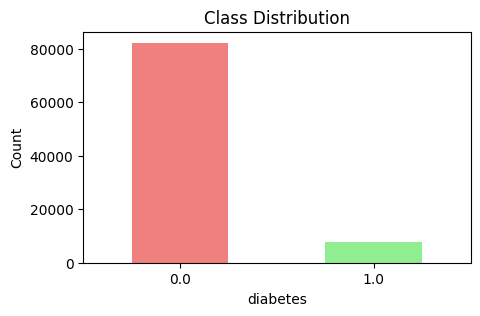

In [ ]:
print(df['diabetes'].value_counts())
plt.figure(figsize=(5, 3))
df['diabetes'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title("Class Distribution")
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

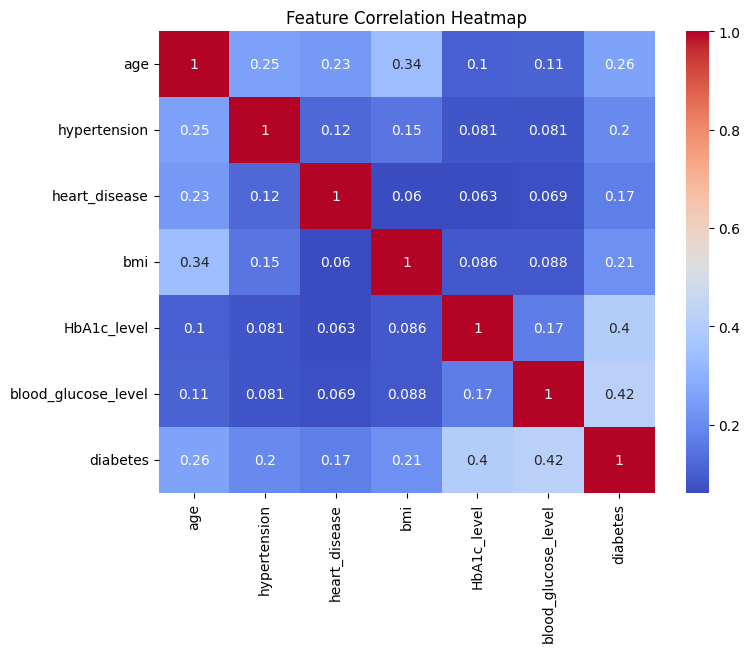

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.nunique()

,0
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4174
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [ ]:
df.isnull().sum()

,0
gender,9835
age,10065
hypertension,10148
heart_disease,9919
smoking_history,9988
bmi,9944
HbA1c_level,10139
blood_glucose_level,9880
diabetes,10082


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['gender', 'smoking_history']
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [ ]:
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.692401,0.0,1.0,never,-0.319834,1.001031,0.049395,0.0
1,Female,NaN,0.0,0.0,No Info,0.001237,1.001031,-1.428782,0.0
2,Male,-0.618076,0.0,0.0,never,0.001237,NaN,0.492849,0.0
3,Female,-0.262618,0.0,0.0,NaN,-0.582118,-0.493535,0.418940,0.0
4,Male,1.514672,1.0,1.0,current,-1.081059,-0.680356,NaN,NaN


# Proccesing

In [ ]:
df = df.dropna(subset=['diabetes'])
print("After deleting rows with missing target:", df.shape)
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
df['smoking_history'].fillna(df['smoking_history'].mode()[0], inplace=True)
print("\nMissing Values After Imputation:")
print(df.isnull().sum())
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
print("\nDataset Shape After Encoding:", df.shape)
scaler = StandardScaler()
scale_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[scale_features] = scaler.fit_transform(df[scale_features])
print("\nFeature Scaling Completed")
print("\nFinal Dataset Shape:", df.shape)
df.head()

After deleting rows with missing target: (89918, 9)

Missing Values After Imputation:
gender                 8840
age                       0
hypertension           9149
heart_disease          8927
smoking_history           0
bmi                       0
HbA1c_level               0
blood_glucose_level       0
diabetes                  0
dtype: int64


/tmp/ipython-input-373362282.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-373362282.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


Dataset Shape After Encoding: (89918, 14)

Feature Scaling Completed

Final Dataset Shape: (89918, 14)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.778875,0.0,1.0,-0.337464,1.026228,0.048515,0.0,False,False,False,False,False,True,False
1,0.044764,0.0,0.0,0.000846,1.026228,-1.507390,0.0,False,False,False,False,False,False,False
2,-0.658254,0.0,0.0,0.000846,0.240487,0.515287,0.0,True,False,False,False,False,True,False
3,-0.283311,0.0,0.0,-0.613830,-0.545255,0.437492,0.0,False,False,False,False,False,False,False
5,-1.033197,NaN,0.0,0.000846,1.026228,-1.377731,0.0,False,False,False,False,False,True,False


# Spliting

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, train_size=0.80, stratify=y, random_state=42)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.125, stratify=y_train, random_state=42)
print("Final Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (71934, 13)
Testing Set Shape: (17984, 13)
Final Training Set Shape: (62942, 13)
Validation Set Shape: (8992, 13)
Test Set Shape: (17984, 13)


# Implementation

In [ ]:

cols_with_nan = ['hypertension', 'heart_disease']
for col in cols_with_nan:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    X_val[col].fillna(median_val, inplace=True)
    X_test[col].fillna(median_val, inplace=True)

/tmp/ipython-input-1975438299.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
/tmp/ipython-input-1975438299.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:",accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9551267793594306
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     16457
         1.0       0.86      0.56      0.68      1527

    accuracy                           0.96     17984
   macro avg       0.91      0.78      0.83     17984
weighted avg       0.95      0.96      0.95     17984



In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:",accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9431717081850534
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     16457
         1.0       0.66      0.68      0.67      1527

    accuracy                           0.94     17984
   macro avg       0.82      0.82      0.82     17984
weighted avg       0.94      0.94      0.94     17984



In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(64,32),activation='relu', solver='adam', max_iter=300, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print("Neural Network Accuracy:",accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Neural Network Accuracy: 0.9621330071174378
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     16457
         1.0       0.87      0.65      0.74      1527

    accuracy                           0.96     17984
   macro avg       0.92      0.82      0.86     17984
weighted avg       0.96      0.96      0.96     17984



/tmp/ipython-input-2213737791.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_imputed_for_kmeans[col].fillna(X_imputed_for_kmeans[col].median(), inplace=True)


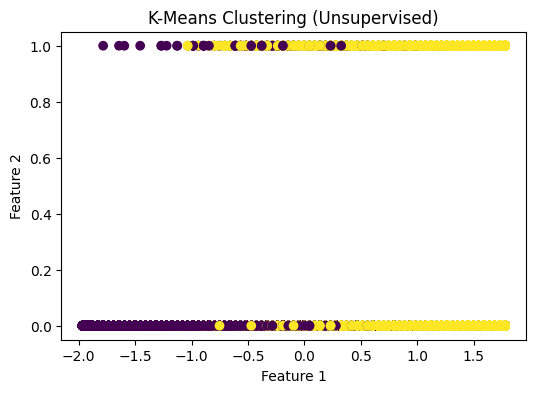

In [ ]:
X_imputed_for_kmeans = X.copy()
for col in cols_with_nan:
    X_imputed_for_kmeans[col].fillna(X_imputed_for_kmeans[col].median(), inplace=True)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_imputed_for_kmeans)
plt.figure(figsize=(6,4))
plt.scatter(X_imputed_for_kmeans.iloc[:, 0], X_imputed_for_kmeans.iloc[:, 1], c=clusters)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering (Unsupervised)")
plt.show()

# MODEL COMPARISION

In [ ]:
models = {"Logistic Regression": log_reg,"Decision Tree": dt,"Neural Network": nn}
accuracy = []
precision = []
recall = []
auc_scores = []

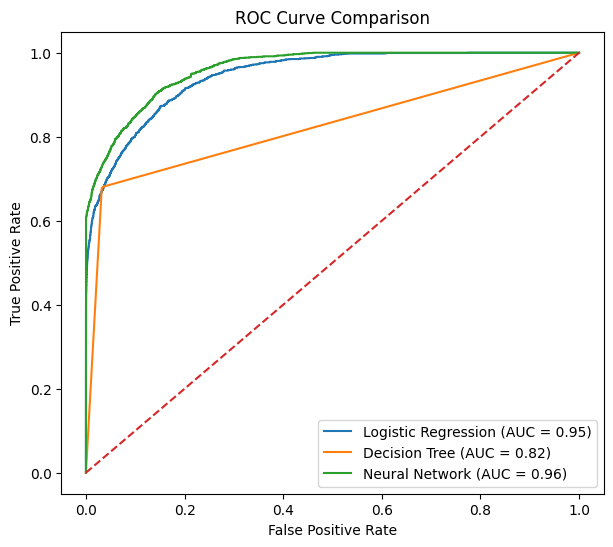

In [ ]:
plt.figure(figsize=(7,6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_value:.2f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

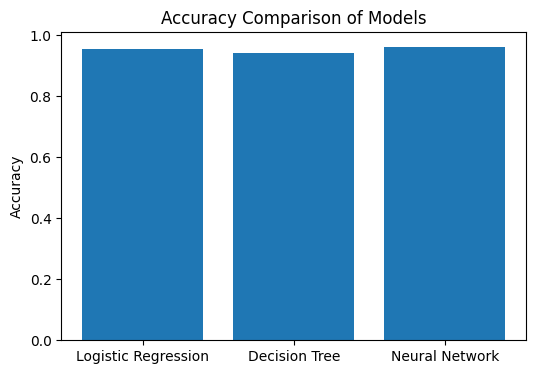

In [ ]:
accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]
plt.figure(figsize=(6,4))
plt.bar(models.keys(), accuracy)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models")
plt.show()

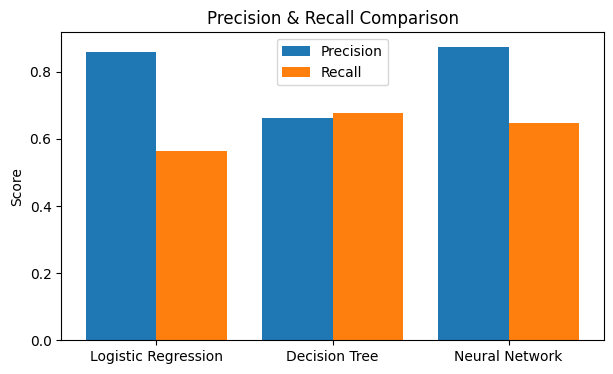

In [ ]:
precision = [precision_score(y_test, model.predict(X_test)) for model in models.values()]
recall = [recall_score(y_test, model.predict(X_test)) for model in models.values()]
x = range(len(models))
plt.figure(figsize=(7,4))
plt.bar(x, precision, width=0.4, label="Precision")
plt.bar([i+0.4 for i in x], recall, width=0.4, label="Recall")
plt.xticks([i+0.2 for i in x], models.keys())
plt.ylabel("Score")
plt.title("Precision & Recall Comparison")
plt.legend()
plt.show()

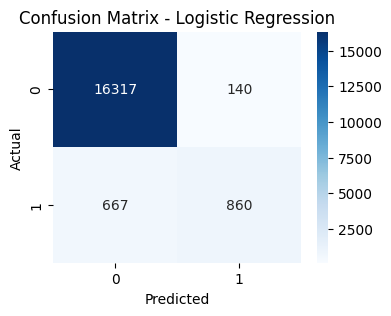

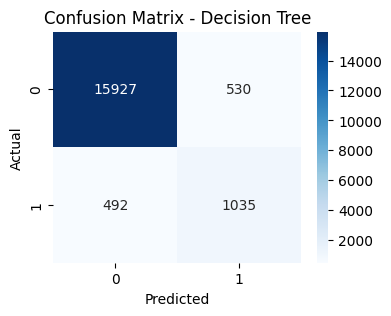

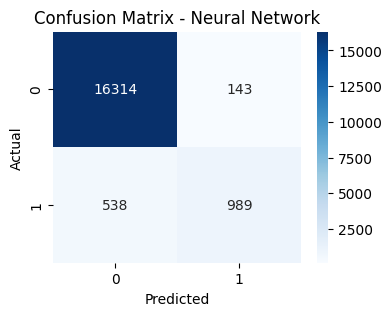

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()